In [6]:
# Importing libraries for data manipulation, visualization, and scaling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This line ensures plots are rendered inline in Jupyter Notebook
%matplotlib inline

In [7]:
# Load the dataset from the CSV file
df = pd.read_csv("C:/Users/Rutvik Suryawanshi/Downloads/archive (1)/big4_financial_risk_compliance.csv")

# Display the shape and first few rows of the dataset
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (100, 12)


,Year,Firm_Name,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Industry_Affected,Total_Revenue_Impact,AI_Used_for_Auditing,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
0,2020,PwC,2829,51,123,39,Healthcare,114.24,No,57,5.8,8.4
1,2022,Deloitte,3589,185,30,60,Healthcare,156.98,Yes,58,5.3,6.7
2,2020,PwC,2438,212,124,97,Healthcare,131.83,No,76,6.1,6.2
3,2021,PwC,2646,397,55,97,Healthcare,229.11,No,60,5.1,8.6
4,2020,PwC,2680,216,99,46,Healthcare,48.00,No,51,9.1,6.7


In [8]:
# Display detailed information about the dataset
df.info()

# Get statistical summary of numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       100 non-null    int64  
 1   Firm_Name                  100 non-null    object 
 2   Total_Audit_Engagements    100 non-null    int64  
 3   High_Risk_Cases            100 non-null    int64  
 4   Compliance_Violations      100 non-null    int64  
 5   Fraud_Cases_Detected       100 non-null    int64  
 6   Industry_Affected          100 non-null    object 
 7   Total_Revenue_Impact       100 non-null    float64
 8   AI_Used_for_Auditing       100 non-null    object 
 9   Employee_Workload          100 non-null    int64  
 10  Audit_Effectiveness_Score  100 non-null    float64
 11  Client_Satisfaction_Score  100 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 9.5+ KB


,Year,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Total_Revenue_Impact,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2022.320000,2784.520000,277.730000,105.480000,52.700000,272.539000,60.250000,7.490000,7.339000
std,1.780251,1281.863073,135.735174,55.370101,28.311221,139.151401,11.163048,1.516209,1.429127
min,2020.000000,603.000000,51.000000,10.000000,5.000000,33.460000,40.000000,5.000000,5.000000
25%,2021.000000,1768.250000,162.500000,54.500000,27.000000,155.217500,52.750000,6.100000,6.100000
50%,2022.000000,2650.000000,293.000000,114.500000,54.000000,264.450000,60.000000,7.450000,7.350000
75%,2024.000000,4008.750000,395.500000,149.500000,74.500000,406.090000,68.000000,8.825000,8.525000
max,2025.000000,4946.000000,500.000000,200.000000,100.000000,497.060000,80.000000,10.000000,10.000000


In [9]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Year                         0
Firm_Name                    0
Total_Audit_Engagements      0
High_Risk_Cases              0
Compliance_Violations        0
Fraud_Cases_Detected         0
Industry_Affected            0
Total_Revenue_Impact         0
AI_Used_for_Auditing         0
Employee_Workload            0
Audit_Effectiveness_Score    0
Client_Satisfaction_Score    0
dtype: int64


In [10]:
# Display unique values in categorical columns
print("Unique values in 'Firm_Name':", df['Firm_Name'].unique())
print("Unique values in 'Industry_Affected':", df['Industry_Affected'].unique())
print("Unique values in 'AI_Used_for_Auditing':", df['AI_Used_for_Auditing'].unique())

Unique values in 'Firm_Name': ['PwC' 'Deloitte' 'Ernst & Young' 'KPMG']
Unique values in 'Industry_Affected': ['Healthcare' 'Finance' 'Retail' 'Tech']
Unique values in 'AI_Used_for_Auditing': ['No' 'Yes']


Numeric columns: ['Year', 'Total_Audit_Engagements', 'High_Risk_Cases', 'Compliance_Violations', 'Fraud_Cases_Detected', 'Total_Revenue_Impact', 'Employee_Workload', 'Audit_Effectiveness_Score', 'Client_Satisfaction_Score']


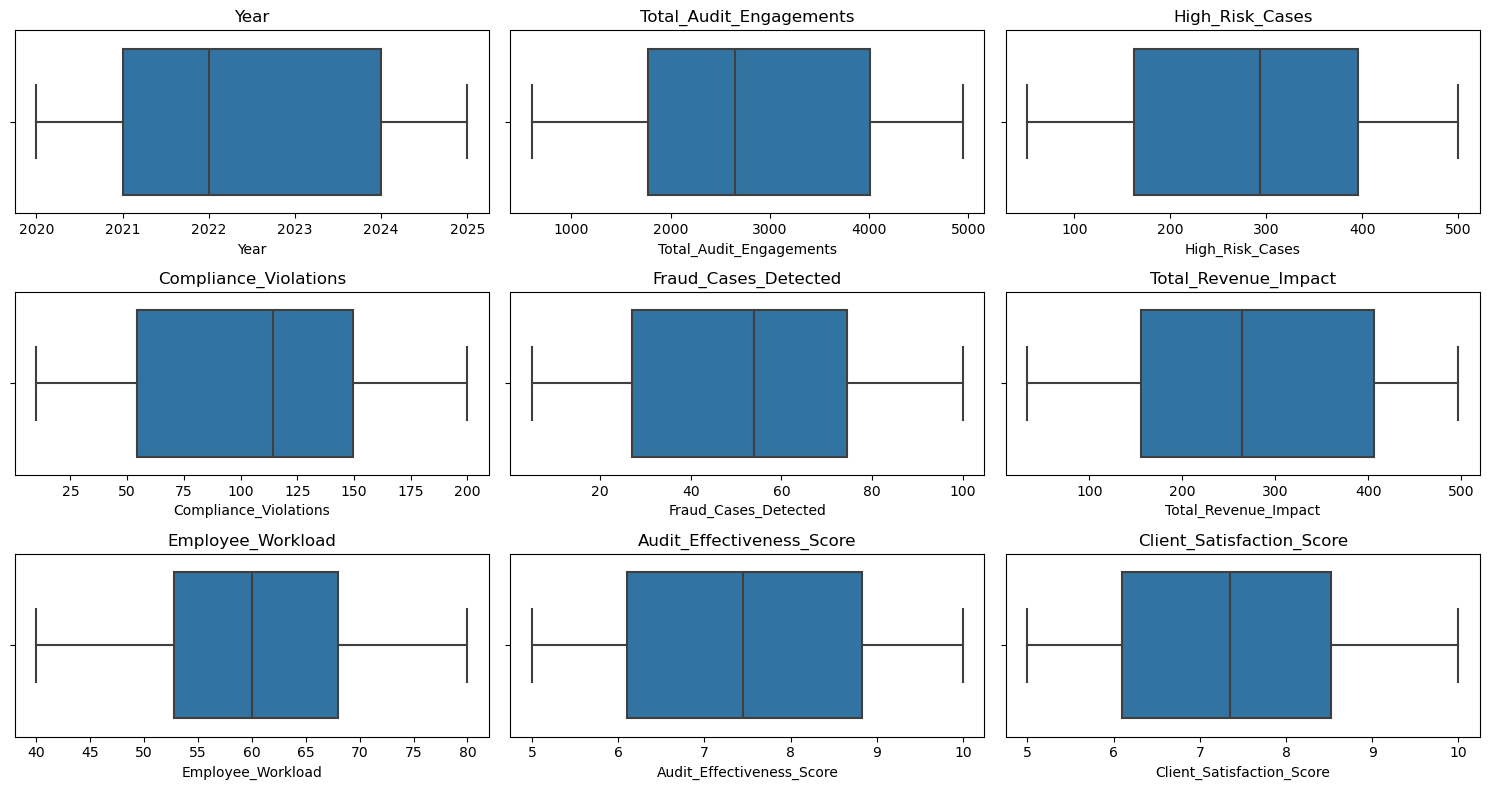

In [11]:
# Get list of numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", numeric_cols)

# Plot boxplots for all numerical columns to detect outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x=col)
    plt.title(col)
    plt.tight_layout()
plt.show()

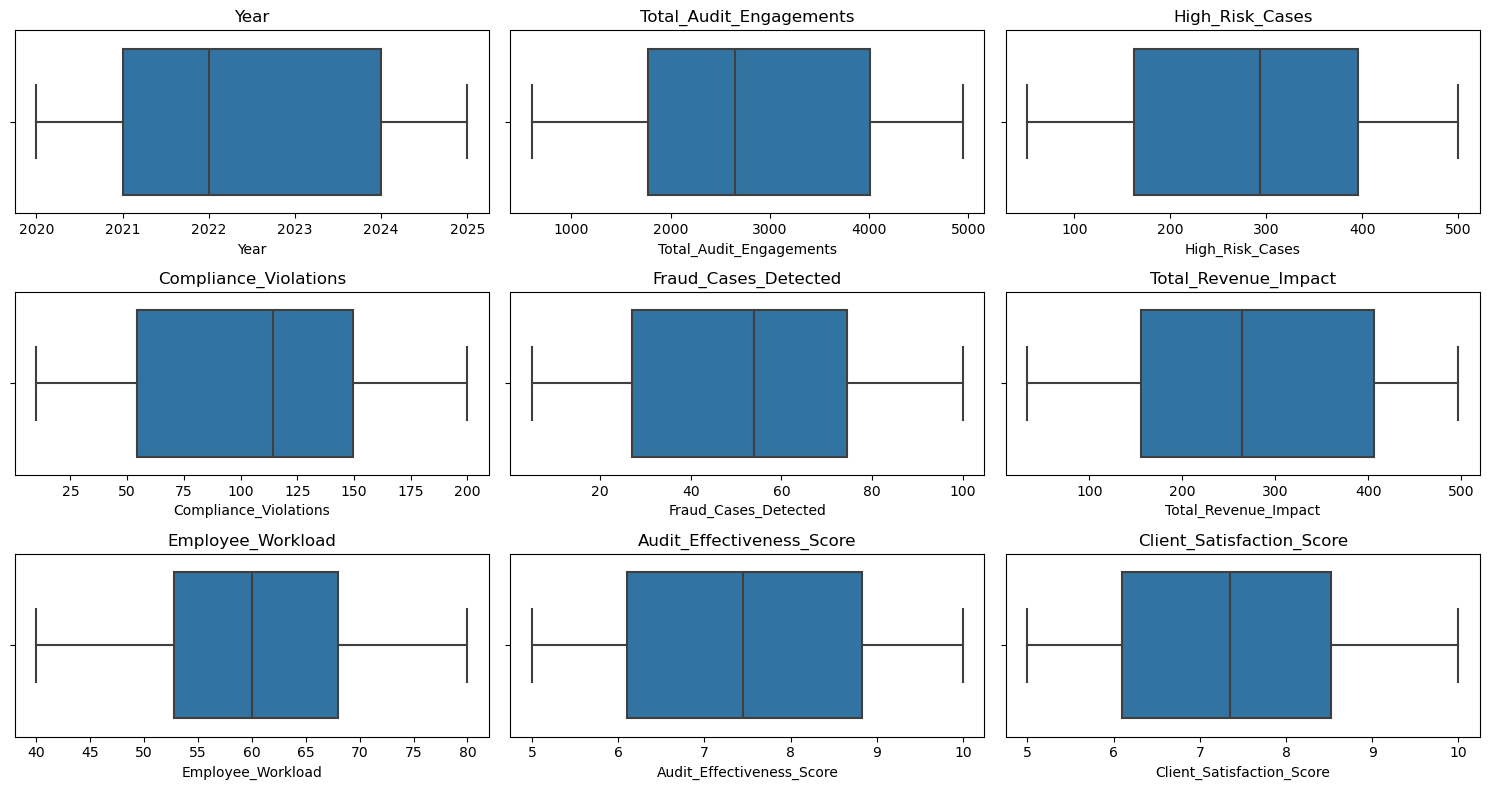

In [12]:
# Function to cap outliers using the IQR method
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

# Create a copy of the original dataframe to cap outliers
df_capped = df.copy()

# Apply the capping function to each numeric column
for col in numeric_cols:
    df_capped[col] = cap_outliers(df_capped[col])

# Visualize boxplots after capping outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df_capped, x=col)
    plt.title(col)
    plt.tight_layout()
plt.show()

In [13]:
# Use one-hot encoding on categorical columns
categorical_cols = ["Firm_Name", "Industry_Affected", "AI_Used_for_Auditing"]
df_encoded = pd.get_dummies(df_capped, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded dataframe
df_encoded.head()

,Year,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Total_Revenue_Impact,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score,Firm_Name_Ernst & Young,Firm_Name_KPMG,Firm_Name_PwC,Industry_Affected_Healthcare,Industry_Affected_Retail,Industry_Affected_Tech,AI_Used_for_Auditing_Yes
0,2020,2829,51,123,39,114.24,57,5.8,8.4,False,False,True,True,False,False,False
1,2022,3589,185,30,60,156.98,58,5.3,6.7,False,False,False,True,False,False,True
2,2020,2438,212,124,97,131.83,76,6.1,6.2,False,False,True,True,False,False,False
3,2021,2646,397,55,97,229.11,60,5.1,8.6,False,False,True,True,False,False,False
4,2020,2680,216,99,46,48.00,51,9.1,6.7,False,False,True,True,False,False,False


In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale all features (after one-hot encoding, all columns are numeric)
scaled_features = scaler.fit_transform(df_encoded)

# Convert the scaled features back into a DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=df_encoded.columns)

# Display the first few rows of the scaled data
df_scaled.head()

,Year,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Total_Revenue_Impact,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score,Firm_Name_Ernst & Young,Firm_Name_KPMG,Firm_Name_PwC,Industry_Affected_Healthcare,Industry_Affected_Retail,Industry_Affected_Tech,AI_Used_for_Auditing_Yes
0,-1.309752,0.034874,-1.678800,0.318010,-0.486345,-1.143334,-0.292606,-1.120238,0.746152,-0.546536,-0.531085,1.732051,1.779513,-0.608164,-0.639101,-0.904534
1,-0.180656,0.630748,-0.686610,-1.370058,0.259147,-0.834639,-0.202573,-1.451669,-0.449379,-0.546536,-0.531085,-0.577350,1.779513,-0.608164,-0.639101,1.105542
2,-1.309752,-0.271687,-0.486691,0.336162,1.572634,-1.016288,1.418013,-0.921379,-0.801005,-0.546536,-0.531085,1.732051,1.779513,-0.608164,-0.639101,-0.904534
3,-0.745204,-0.108606,0.883123,-0.916276,1.572634,-0.313671,-0.022508,-1.584241,0.886802,-0.546536,-0.531085,1.732051,1.779513,-0.608164,-0.639101,-0.904534
4,-1.309752,-0.081948,-0.457074,-0.117620,-0.237848,-1.621760,-0.832801,1.067209,-0.449379,-0.546536,-0.531085,1.732051,1.779513,-0.608164,-0.639101,-0.904534
